**Unduh & Siapkan Data**

TRAIN_CSV   = /kaggle/input/penyisihan-hology-7-data-mining-competition/train.csv
SUB_CSV     = /kaggle/input/penyisihan-hology-7-data-mining-competition/sample_submission.csv
TRAIN_DIR   = /kaggle/input/penyisihan-hology-7-data-mining-competition/train/train
TEST_DIR    = /kaggle/input/penyisihan-hology-7-data-mining-competition/test/test
Missing train paths: 0
Missing test  paths: 0


,id,jenis,warna,filename,filepath
0,1,1,1,1.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
1,2,0,2,2.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
2,3,1,3,3.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
3,4,1,1,4.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
4,5,0,4,5.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...


,id,jenis,warna,filename,filepath
0,778,0,0,778.png,/kaggle/input/penyisihan-hology-7-data-mining-...
1,779,0,0,779.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
2,780,0,0,780.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
3,781,0,0,781.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
4,782,0,0,782.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...


Contoh mapping train: [('623', '623.jpg'), ('764', '764.jpg'), ('771', '771.jpg'), ('208', '208.jpg'), ('473', '473.jpg')]
Contoh mapping test : [('1075', '1075.jpg'), ('820', '820.jpg'), ('1024', '1024.jpg'), ('785', '785.jpg'), ('792', '792.jpg')]
Train labels:


,id,jenis,warna,filename,filepath
0,1,1,1,1.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
1,2,0,2,2.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
2,3,1,3,3.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
3,4,1,1,4.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
4,5,0,4,5.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...


Submission template:


,id,jenis,warna,filename,filepath
0,778,0,0,778.png,/kaggle/input/penyisihan-hology-7-data-mining-...
1,779,0,0,779.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
2,780,0,0,780.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
3,781,0,0,781.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...
4,782,0,0,782.jpg,/kaggle/input/penyisihan-hology-7-data-mining-...


Distribusi jenis (0=Kaos, 1=Hoodie):
jenis
0    476
1    301
Name: count, dtype: int64 

Distribusi warna (0=merah,1=kuning,2=biru,3=hitam,4=putih):
warna
3    234
2    162
4    140
1    125
0    116
Name: count, dtype: int64


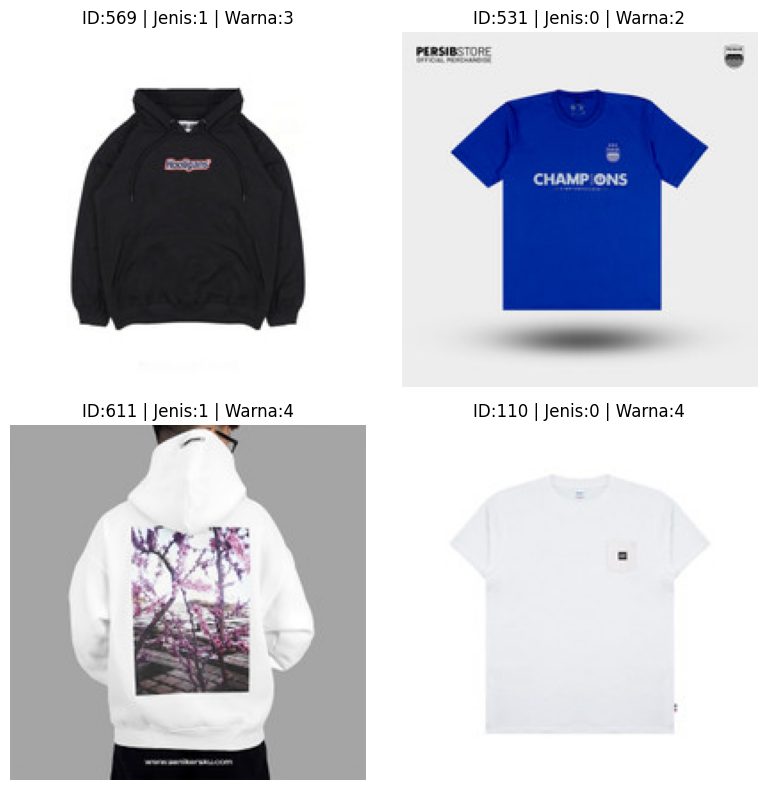

In [1]:
# ─── Cell 1: Import Library ──────────────────────────────────────────────────
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# ─── Cell 2: Tentukan Paths sesuai struktur di Kaggle Input ─────────────────
DATA_ROOT    = '/kaggle/input/penyisihan-hology-7-data-mining-competition'

# CSV label di root
TRAIN_CSV    = os.path.join(DATA_ROOT, 'train.csv')
# Bisa bernama sample_submission.csv atau submission.csv
if os.path.isfile(os.path.join(DATA_ROOT, 'sample_submission.csv')):
    SUB_CSV = os.path.join(DATA_ROOT, 'sample_submission.csv')
elif os.path.isfile(os.path.join(DATA_ROOT, 'submission.csv')):
    SUB_CSV = os.path.join(DATA_ROOT, 'submission.csv')
else:
    raise FileNotFoundError("Tidak menemukan sample_submission.csv atau submission.csv di root input")

# Gambar ada di nested folder:
TRAIN_DIR    = os.path.join(DATA_ROOT, 'train', 'train')
TEST_DIR     = os.path.join(DATA_ROOT, 'test',  'test')

# Verifikasi paths
print("TRAIN_CSV   =", TRAIN_CSV)
print("SUB_CSV     =", SUB_CSV)
print("TRAIN_DIR   =", TRAIN_DIR)
print("TEST_DIR    =", TEST_DIR)
assert os.path.isfile(TRAIN_CSV), "train.csv tidak ada!"
assert os.path.isfile(SUB_CSV), "sample_submission/submission.csv tidak ada!"
assert os.path.isdir(TRAIN_DIR), "Folder train/train tidak ada!"
assert os.path.isdir(TEST_DIR), "Folder test/test tidak ada!"

# ─── Cell 3: Bangun peta filename → id ───────────────────────────────────────

# List semua file di TRAIN_DIR & TEST_DIR
train_files = os.listdir(TRAIN_DIR)
test_files  = os.listdir(TEST_DIR)

# Buat dict mapping: id_string → filename (misal '18' → '18.png' atau '18.jpg')
train_map = {os.path.splitext(f)[0]: f for f in train_files}
test_map  = {os.path.splitext(f)[0]: f for f in test_files}

# ─── Cell 4: Load CSV & Buat filepath dinamis ───────────────────────────────
import pandas as pd

train_df = pd.read_csv(TRAIN_CSV)
test_df  = pd.read_csv(SUB_CSV)

# Pakai mapping untuk cari nama file yang benar
train_df['filename'] = train_df['id'].map(lambda x: train_map.get(str(x)))
test_df ['filename'] = test_df ['id'].map(lambda x: test_map.get(str(x)))

# Buat kolom filepath; jika filename None, akan jadi NaN
train_df['filepath'] = train_df['filename'].map(lambda f: os.path.join(TRAIN_DIR, f) if pd.notna(f) else None)
test_df ['filepath'] = test_df ['filename'].map(lambda f: os.path.join(TEST_DIR,  f) if pd.notna(f) else None)

# Cek kalau ada yang gagal ter-mapping
missing_train = train_df['filepath'].isna().sum()
missing_test  = test_df ['filepath'].isna().sum()
print(f"Missing train paths: {missing_train}")
print(f"Missing test  paths: {missing_test}")

display(train_df.head())
display(test_df.head())
# Verifikasi
print("Contoh mapping train:", list(train_map.items())[:5])
print("Contoh mapping test :", list(test_map.items())[:5])
# Tampilkan sekilas
print("Train labels:")
display(train_df.head())
print("Submission template:")
display(test_df.head())

# ─── Cell 4: Cek Distribusi Label ────────────────────────────────────────────
print("Distribusi jenis (0=Kaos, 1=Hoodie):")
print(train_df['jenis'].value_counts(), "\n")

print("Distribusi warna (0=merah,1=kuning,2=biru,3=hitam,4=putih):")
print(train_df['warna'].value_counts())

# ─── Cell 5: Preview Contoh Gambar ───────────────────────────────────────────
sample = train_df.sample(4, random_state=42)
plt.figure(figsize=(8,8))
for i, row in enumerate(sample.itertuples()):
    img = Image.open(row.filepath)
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(f"ID:{row.id} | Jenis:{row.jenis} | Warna:{row.warna}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Eksplorasi Data (EDA)**

In [2]:
import numpy as np
# ─── Cell 7: Ringkasan DataFrame & Missing Values ────────────────────────────
print("Ukuran dataset train:", train_df.shape)
print("Ukuran dataset test :", test_df.shape)
print("\nInfo train_df:")
display(train_df.info())

print("\nJumlah nilai NA per kolom (train):")
print(train_df.isna().sum())

Ukuran dataset train: (777, 5)
Ukuran dataset test : (334, 5)

Info train_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        777 non-null    int64 
 1   jenis     777 non-null    int64 
 2   warna     777 non-null    int64 
 3   filename  777 non-null    object
 4   filepath  777 non-null    object
dtypes: int64(3), object(2)
memory usage: 30.5+ KB


None


Jumlah nilai NA per kolom (train):
id          0
jenis       0
warna       0
filename    0
filepath    0
dtype: int64


Count per jenis (0=Kaos,1=Hoodie):
 jenis
0    476
1    301
Name: count, dtype: int64 

Count per warna (0=merah,1=kuning,2=biru,3=hitam,4=putih):
 warna
0    116
1    125
2    162
3    234
4    140
Name: count, dtype: int64


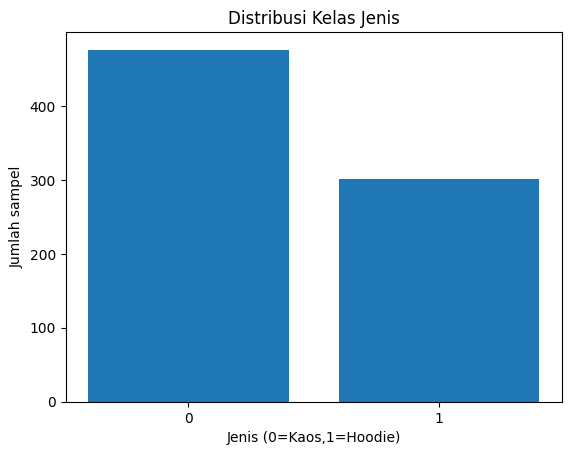

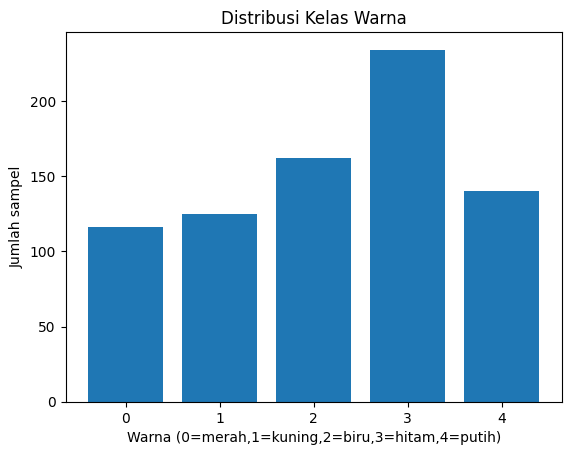

In [3]:
# ─── Cell 8: Distribusi Kelas Jenis & Warna ─────────────────────────────────
# Tabel count
count_jenis = train_df['jenis'].value_counts().sort_index()
count_warna = train_df['warna'].value_counts().sort_index()

print("Count per jenis (0=Kaos,1=Hoodie):\n", count_jenis, "\n")
print("Count per warna (0=merah,1=kuning,2=biru,3=hitam,4=putih):\n", count_warna)

# Bar chart untuk jenis
plt.figure()
plt.bar(count_jenis.index.astype(str), count_jenis.values)
plt.xlabel('Jenis (0=Kaos,1=Hoodie)')
plt.ylabel('Jumlah sampel')
plt.title('Distribusi Kelas Jenis')
plt.show()

# Bar chart untuk warna
plt.figure()
plt.bar(count_warna.index.astype(str), count_warna.values)
plt.xlabel('Warna (0=merah,1=kuning,2=biru,3=hitam,4=putih)')
plt.ylabel('Jumlah sampel')
plt.title('Distribusi Kelas Warna')
plt.show()

Crosstab Jenis vs Warna:
 warna   0   1    2    3   4
jenis                      
0      80  71  103  131  91
1      36  54   59  103  49


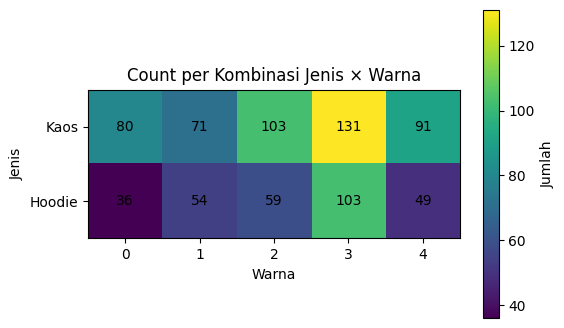

In [4]:
# ─── Cell 9: Crosstab Jenis vs Warna ────────────────────────────────────────
cross = pd.crosstab(train_df['jenis'], train_df['warna'])
print("Crosstab Jenis vs Warna:\n", cross)

# Visualisasi heatmap sederhana dengan text annotation
plt.figure(figsize=(6,4))
plt.imshow(cross.values)
plt.xticks(np.arange(5), cross.columns)
plt.yticks(np.arange(2), ['Kaos','Hoodie'])
for i in range(cross.shape[0]):
    for j in range(cross.shape[1]):
        plt.text(j, i, cross.values[i,j], ha='center', va='center')
plt.xlabel('Warna')
plt.ylabel('Jenis')
plt.title('Count per Kombinasi Jenis × Warna')
plt.colorbar(label='Jumlah')
plt.show()

Rata-rata lebar  : 200.0
Rata-rata tinggi : 200.0
Min / Max lebar  : 200 / 200
Min / Max tinggi : 200 / 200


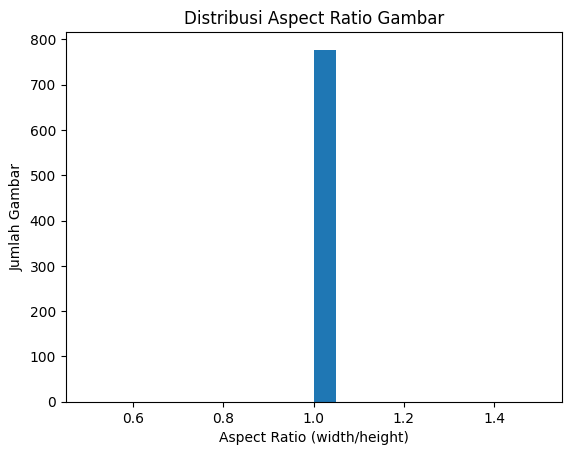

In [5]:
# ─── Cell 10: Analisis Ukuran & Aspect Ratio Gambar ─────────────────────────
# Hitung dimensi setiap gambar
sizes = train_df['filepath'].map(lambda p: Image.open(p).size)
widths, heights = zip(*sizes)

print("Rata-rata lebar  :", np.mean(widths))
print("Rata-rata tinggi :", np.mean(heights))
print("Min / Max lebar  :", np.min(widths), "/", np.max(widths))
print("Min / Max tinggi :", np.min(heights), "/", np.max(heights))

# Histogram aspect ratio
aspect = np.array(widths) / np.array(heights)
plt.figure()
plt.hist(aspect, bins=20)
plt.xlabel('Aspect Ratio (width/height)')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Aspect Ratio Gambar')
plt.show()

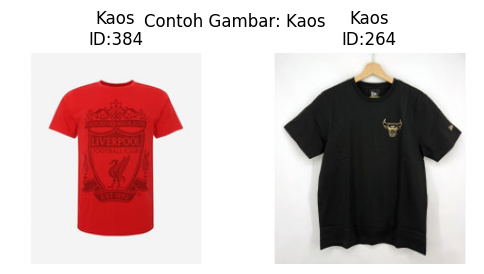

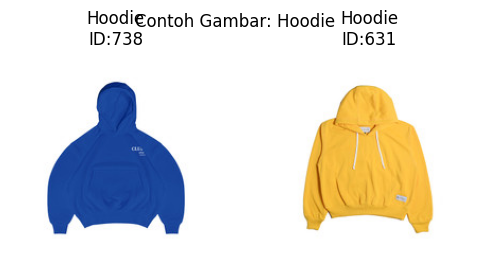

In [6]:
# ─── Cell 11: Beberapa Contoh per Kelas Jenis ────────────────────────────────
# Ambil 2 sampel random per jenis
for jenis_val, label in [(0,'Kaos'), (1,'Hoodie')]:
    samp = train_df[train_df['jenis']==jenis_val].sample(2, random_state=jenis_val)
    plt.figure(figsize=(6,3))
    for i, row in enumerate(samp.itertuples()):
        img = Image.open(row.filepath)
        plt.subplot(1,2,i+1)
        plt.imshow(img)
        plt.title(f"{label}\nID:{row.id}")
        plt.axis('off')
    plt.suptitle(f"Contoh Gambar: {label}")
    plt.show()

**Preprocessing & Augmentasi**

In [7]:
# ─── Cell 12: Import Tambahan ────────────────────────────────────────────────
from sklearn.model_selection import train_test_split
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

In [8]:
# ─── Cell 13: Stratified Split ke Train/Val ──────────────────────────────────
# Gabungkan jenis & warna jadi single label untuk stratify
train_df['combo'] = train_df['jenis'].astype(str) + "_" + train_df['warna'].astype(str)

train_df, val_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df['combo'],
    random_state=42
)
print("Train:", train_df.shape, " Val:", val_df.shape)

Train: (621, 6)  Val: (156, 6)


In [9]:
# ─── Cell 14: Definisikan Transforms ─────────────────────────────────────────
IMG_SIZE = 224

train_transform = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.RandomHorizontalFlip(),
    T.RandomRotation(15),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    T.ToTensor(),
    T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

val_transform = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
])

In [10]:
# ─── Cell 15: Custom Dataset & DataLoader ────────────────────────────────────
class FashionDataset(Dataset):
    def __init__(self, df, transforms):
        self.df = df.reset_index(drop=True)
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img = Image.open(row.filepath).convert("RGB")
        img = self.transforms(img)
        return {
            "image": img,
            "jenis": torch.tensor(row.jenis, dtype=torch.float),  # BCE
            "warna": torch.tensor(row.warna, dtype=torch.long)    # CE
        }

train_ds = FashionDataset(train_df, train_transform)
val_ds   = FashionDataset(val_df,   val_transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True,  num_workers=2)
val_loader   = DataLoader(val_ds,   batch_size=32, shuffle=False, num_workers=2)

print("DataLoaders siap. Contoh batch:")
batch = next(iter(train_loader))
print(batch["image"].shape, batch["jenis"].shape, batch["warna"].shape)

DataLoaders siap. Contoh batch:
torch.Size([32, 3, 224, 224]) torch.Size([32]) torch.Size([32])


**Bagi Data Train/Validasi**

In [11]:
# ─── Cell 13: Stratified Split ke Train & Validation ─────────────────────────
from sklearn.model_selection import train_test_split

# Buat kolom kombinasi untuk stratify
train_df['combo'] = train_df['jenis'].astype(str) + "_" + train_df['warna'].astype(str)

# Lakukan split: 80% train, 20% val
train_split_df, val_split_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df['combo'],
    random_state=42
)

# Hapus kolom helper
train_split_df = train_split_df.drop(columns=['combo'])
val_split_df   = val_split_df.drop(columns=['combo'])

print(f"Shape train: {train_split_df.shape}")
print(f"Shape val  : {val_split_df.shape}")

# Cek distribusi ulang
print("\nDistribusi 'jenis' di train vs val:")
print(train_split_df['jenis'].value_counts(normalize=True))
print(val_split_df['jenis'].value_counts(normalize=True))

print("\nDistribusi 'warna' di train vs val:")
print(train_split_df['warna'].value_counts(normalize=True))
print(val_split_df['warna'].value_counts(normalize=True))

Shape train: (496, 5)
Shape val  : (125, 5)

Distribusi 'jenis' di train vs val:
jenis
0    0.612903
1    0.387097
Name: proportion, dtype: float64
jenis
0    0.616
1    0.384
Name: proportion, dtype: float64

Distribusi 'warna' di train vs val:
warna
3    0.302419
2    0.207661
4    0.179435
1    0.161290
0    0.149194
Name: proportion, dtype: float64
warna
3    0.296
2    0.208
4    0.184
1    0.160
0    0.152
Name: proportion, dtype: float64


**Definisikan Model Baseline**

In [12]:
import torch
import torchvision.transforms as T
from PIL import Image
import timm, torch.nn as nn
from torch.utils.data import Dataset

# Ukuran input dan transform transformasi validasi
IMG_SIZE = 224
val_tf = T.Compose([
    T.Resize((IMG_SIZE, IMG_SIZE)),
    T.ToTensor(),
    T.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

# Dataset class
class FashionDS(Dataset):
    def __init__(self, df, tf): 
        self.df, self.tf = df.reset_index(drop=True), tf
    def __len__(self): 
        return len(self.df)
    def __getitem__(self, i):
        r = self.df.iloc[i]
        img = Image.open(r.filepath).convert('RGB')
        return self.tf(img), torch.tensor(r.jenis, dtype=torch.float), torch.tensor(r.warna, dtype=torch.long)

In [13]:
# ─── Cell 16: Import Library untuk Model ────────────────────────────────────
import timm
import torch
import torch.nn as nn

# ─── Cell 17: Definisikan Multi-Task Model ──────────────────────────────────
class MultiTaskModel(nn.Module):
    def __init__(self, backbone_name='efficientnet_b3', pretrained=True, num_color_classes=5):
        super().__init__()
        # 1. Load pretrained backbone without classifier head
        self.backbone = timm.create_model(backbone_name, pretrained=pretrained, num_classes=0, global_pool='avg')
        feat_dim = self.backbone.num_features
        
        # 2. Head untuk tugas 'jenis' (binary classification)
        self.head_jenis = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(feat_dim, 1)  # output logit untuk BCEWithLogitsLoss
        )
        
        # 3. Head untuk tugas 'warna' (multi-class)
        self.head_warna = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(feat_dim, num_color_classes)  # output logits untuk CrossEntropyLoss
        )

    def forward(self, x):
        # shared feature extractor
        feats = self.backbone(x)  # shape: (B, feat_dim)
        
        # two separate heads
        logit_jenis = self.head_jenis(feats).squeeze(1)       # shape: (B,)
        logit_warna = self.head_warna(feats)                  # shape: (B, num_color_classes)
        
        return logit_jenis, logit_warna

# ─── Cell 18: Instansiasi & Cek Output Shape ────────────────────────────────
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultiTaskModel().to(device)
model.eval()

# Dummy input: batch_size=4, RGB 224×224
dummy = torch.randn(4, 3, 224, 224).to(device)
out_jenis, out_warna = model(dummy)
print(f"logit_jenis shape: {out_jenis.shape}  (should be [4])")
print(f"logit_warna shape: {out_warna.shape}  (should be [4, 5])")

model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

logit_jenis shape: torch.Size([4])  (should be [4])
logit_warna shape: torch.Size([4, 5])  (should be [4, 5])


**Konfigurasi Pelatihan**

In [14]:
# ─── Cell 19: Definisikan Loss Functions & Metrics ─────────────────────────
import torch.nn as nn

# Untuk tugas 'jenis' (binary): BCEWithLogitsLoss
criterion_jenis = nn.BCEWithLogitsLoss()

# Untuk tugas 'warna' (5-class): CrossEntropyLoss
criterion_warna = nn.CrossEntropyLoss()

# (Opsional) fungsi untuk menghitung Exact Match Ratio di validation
def exact_match_ratio(logit_jenis, logit_warna, true_jenis, true_warna, thresh=0.5):
    pred_jenis = (torch.sigmoid(logit_jenis) > thresh).long()
    pred_warna = torch.argmax(logit_warna, dim=1)
    correct = ((pred_jenis == true_jenis) & (pred_warna == true_warna)).float()
    return correct.mean().item()

In [15]:
# ─── Cell 20: Freeze Backbone & Atur Parameter yang Akan Di-train ──────────
# Freeze semua parameter backbone
for param in model.backbone.parameters():
    param.requires_grad = False

# Abaikan freeze untuk kedua head (sudah default requires_grad=True)
# Jika mau unfreeze sebagian backbone setelah warm-up, tambahkan di training loop.

# Cek jumlah parameter yang akan di-train
trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
total     = sum(p.numel() for p in model.parameters())
print(f"Trainable params: {trainable:,} / {total:,}")

Trainable params: 9,222 / 10,705,454


In [16]:
# ─── Cell 21: Definisikan Optimizer & Scheduler ─────────────────────────────
import torch.optim as optim

# Parameter groups: head lebih besar lr, backbone (jika later di-unfreeze) lebih kecil
optimizer = optim.AdamW([
    {"params": model.head_jenis.parameters(), "lr": 1e-3},
    {"params": model.head_warna.parameters(), "lr": 1e-3},
    {"params": [p for p in model.backbone.parameters() if p.requires_grad], "lr": 1e-4}
], weight_decay=1e-4)

# Scheduler: OneCycleLR
from torch.optim.lr_scheduler import OneCycleLR
scheduler = OneCycleLR(
    optimizer,
    max_lr=[1e-3, 1e-3, 1e-4],
    total_steps = len(train_loader) * 20,  # misal 20 epoch
    pct_start = 0.1,
    anneal_strategy='cos'
)

In [17]:
# ─── Cell 22: (Opsional) Unfreeze Backbone untuk Fine-tuning Penuh ─────────
# Setelah 5–10 epoch hanya training head, kamu bisa unfreeze sebagian atau seluruh backbone:
for param in model.backbone.parameters():
    param.requires_grad = True

# Ulang atur optimizer & scheduler jika perlu, atau biarkan scheduler berjalan

**Latih Model & Monitor EMR**

In [18]:
import torch
from tqdm import tqdm

# Hyperparams
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Siapkan list untuk menyimpan metrik
metrics = {'train_loss': [], 'val_loss': [], 'val_emr': []}
best_val_emr = 0.0

for epoch in range(1, num_epochs+1):
    # Training
    model.train()
    total_tl = 0.0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs} [Train]"):
        imgs = batch["image"].to(device)
        yj   = batch["jenis"].to(device)
        yw   = batch["warna"].to(device)

        optimizer.zero_grad()
        lj, lw = model(imgs)
        loss = criterion_jenis(lj, yj) + criterion_warna(lw, yw)
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        total_tl += loss.item() * imgs.size(0)
    avg_tl = total_tl / len(train_loader.dataset)
    metrics['train_loss'].append(avg_tl)
    
    # Validation
    model.eval()
    total_vl = 0.0
    total_emr = 0.0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch}/{num_epochs} [ Val ]"):
            imgs = batch["image"].to(device)
            yj   = batch["jenis"].to(device)
            yw   = batch["warna"].to(device)

            lj, lw = model(imgs)
            loss = criterion_jenis(lj, yj) + criterion_warna(lw, yw)
            total_vl += loss.item() * imgs.size(0)
            
            pred_j = (torch.sigmoid(lj) > 0.5).long()
            pred_w = torch.argmax(lw, dim=1)
            total_emr += ((pred_j == yj.long()) & (pred_w == yw)).float().sum().item()

    avg_vl  = total_vl  / len(val_loader.dataset)
    avg_emr = total_emr / len(val_loader.dataset)
    metrics['val_loss'].append(avg_vl)
    metrics['val_emr'].append(avg_emr)

    print(f"Epoch {epoch:02d} — Train Loss: {avg_tl:.4f} | Val Loss: {avg_vl:.4f} | Val EMR: {avg_emr:.4f}")

    # Simpan model terbaik
    if avg_emr > best_val_emr:
        best_val_emr = avg_emr
        torch.save(model.state_dict(), 'best_model.pth')
        print(f"  ↳ New best EMR: {best_val_emr:.4f}, model saved.")

Epoch 1/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  6.41it/s]


Epoch 01 — Train Loss: 2.3006 | Val Loss: 2.2259 | Val EMR: 0.2179
  ↳ New best EMR: 0.2179, model saved.


Epoch 2/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.57it/s]


Epoch 02 — Train Loss: 1.9909 | Val Loss: 1.8273 | Val EMR: 0.4295
  ↳ New best EMR: 0.4295, model saved.


Epoch 3/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.48it/s]


Epoch 03 — Train Loss: 1.5805 | Val Loss: 1.5068 | Val EMR: 0.6346
  ↳ New best EMR: 0.6346, model saved.


Epoch 4/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.64it/s]


Epoch 04 — Train Loss: 1.2688 | Val Loss: 1.3279 | Val EMR: 0.7115
  ↳ New best EMR: 0.7115, model saved.


Epoch 5/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.39it/s]


Epoch 05 — Train Loss: 1.0832 | Val Loss: 1.1664 | Val EMR: 0.7628
  ↳ New best EMR: 0.7628, model saved.


Epoch 6/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.72it/s]


Epoch 06 — Train Loss: 0.9661 | Val Loss: 1.0743 | Val EMR: 0.7628


Epoch 7/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.61it/s]


Epoch 07 — Train Loss: 0.8833 | Val Loss: 1.0063 | Val EMR: 0.7756
  ↳ New best EMR: 0.7756, model saved.


Epoch 8/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.52it/s]


Epoch 08 — Train Loss: 0.8030 | Val Loss: 0.9471 | Val EMR: 0.7821
  ↳ New best EMR: 0.7821, model saved.


Epoch 9/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.39it/s]


Epoch 09 — Train Loss: 0.7349 | Val Loss: 0.9059 | Val EMR: 0.7885
  ↳ New best EMR: 0.7885, model saved.


Epoch 10/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.42it/s]


Epoch 10 — Train Loss: 0.6955 | Val Loss: 0.8667 | Val EMR: 0.7885


Epoch 11/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.34it/s]


Epoch 11 — Train Loss: 0.6841 | Val Loss: 0.8602 | Val EMR: 0.7885


Epoch 12/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.34it/s]


Epoch 12 — Train Loss: 0.6696 | Val Loss: 0.8404 | Val EMR: 0.7821


Epoch 13/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.36it/s]


Epoch 13 — Train Loss: 0.6443 | Val Loss: 0.7974 | Val EMR: 0.8141
  ↳ New best EMR: 0.8141, model saved.


Epoch 14/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.23it/s]


Epoch 14 — Train Loss: 0.6620 | Val Loss: 0.7935 | Val EMR: 0.8141


Epoch 15/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.26it/s]


Epoch 15 — Train Loss: 0.6286 | Val Loss: 0.7936 | Val EMR: 0.7885


Epoch 16/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  6.97it/s]


Epoch 16 — Train Loss: 0.6229 | Val Loss: 0.8005 | Val EMR: 0.7949


Epoch 17/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  6.88it/s]


Epoch 17 — Train Loss: 0.5737 | Val Loss: 0.7926 | Val EMR: 0.8013


Epoch 18/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.02it/s]


Epoch 18 — Train Loss: 0.6000 | Val Loss: 0.7845 | Val EMR: 0.8013


Epoch 19/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  6.89it/s]


Epoch 19 — Train Loss: 0.5840 | Val Loss: 0.7818 | Val EMR: 0.8013


Epoch 20/20 [ Val ]: 100%|██████████| 5/5 [00:00<00:00,  7.11it/s]


Epoch 20 — Train Loss: 0.5942 | Val Loss: 0.7584 | Val EMR: 0.8205
  ↳ New best EMR: 0.8205, model saved.


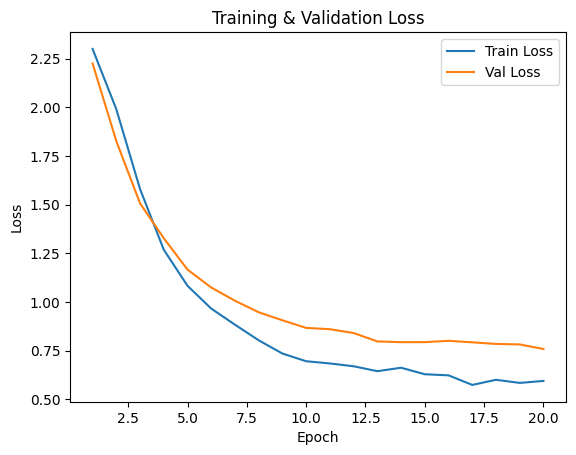

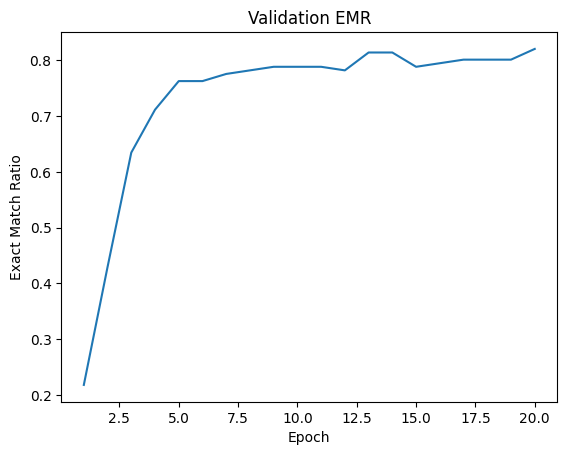

In [19]:
import matplotlib.pyplot as plt

epochs = list(range(1, len(metrics['train_loss'])+1))

# Training & Validation Loss
plt.figure()
plt.plot(epochs, metrics['train_loss'])
plt.plot(epochs, metrics['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend(['Train Loss', 'Val Loss'])
plt.show()

# Validation EMR
plt.figure()
plt.plot(epochs, metrics['val_emr'])
plt.xlabel('Epoch')
plt.ylabel('Exact Match Ratio')
plt.title('Validation EMR')
plt.show()

**Advanced Tuning**

In [20]:
# ─── Advanced Tuning: Augmentasi, Full Fine-Tuning, Hyperparameter Search, Metric-Learning ───

import os, random, numpy as np, pandas as pd
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
from torchvision.transforms import RandAugment, RandomErasing
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import timm

# 1) DataFrame & Filepaths (as before)…
# train_df, test_df, TRAIN_DIR, etc.

# 2) Advanced Augmentasi Pipeline
IMG_SIZE = 224
train_transform = T.Compose([
    T.Resize((IMG_SIZE,IMG_SIZE)),
    RandAugment(num_ops=2, magnitude=9),          # RandAugment
    T.RandomHorizontalFlip(),
    T.ColorJitter(0.4,0.4,0.4,0.1),
    T.ToTensor(),
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
    RandomErasing(p=0.5, scale=(0.02,0.2)),       # Random Erasing
])
val_transform = T.Compose([
    T.Resize((IMG_SIZE,IMG_SIZE)),
    T.ToTensor(),
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),
])

# 3) MixUp / CutMix Utilities
def mixup(x, yj, yw, alpha=0.4):
    lam = np.random.beta(alpha,alpha)
    idx = torch.randperm(x.size(0)).to(x.device)
    return lam*x + (1-lam)*x[idx], yj, yj[idx], lam, yw, yw[idx], lam

def cutmix(x, yj, yw, alpha=1.0):
    lam = np.random.beta(alpha,alpha)
    B,C,H,W = x.size(); idx = torch.randperm(B).to(x.device)
    cut_rat = np.sqrt(1-lam)
    cw,ch = int(W*cut_rat), int(H*cut_rat)
    cx,cy = np.random.randint(W), np.random.randint(H)
    x1,y1 = max(cx-cw//2,0), max(cy-ch//2,0)
    x2,y2 = min(cx+cw//2,W), min(cy+ch//2,H)
    x_new = x.clone()
    x_new[:,:,y1:y2,x1:x2] = x[idx,:,y1:y2,x1:x2]
    lam_adj = 1 - ((x2-x1)*(y2-y1)/(W*H))
    return x_new, yj, yj[idx], lam_adj, yw, yw[idx], lam_adj

# 4) Dataset
class FashionDS(Dataset):
    def __init__(self, df, tf): self.df, self.tf = df.reset_index(drop=True), tf
    def __len__(self): return len(self.df)
    def __getitem__(self, i):
        r = self.df.iloc[i]
        img = Image.open(r.filepath).convert('RGB')
        x   = self.tf(img)
        return x, torch.tensor(r.jenis, dtype=torch.float), torch.tensor(r.warna, dtype=torch.long)

# 5) ArcFace Head for Metric Learning
class ArcMarginProduct(nn.Module):
    def __init__(self, in_features, out_features, s=30.0, m=0.50):
        super().__init__()
        self.weight = nn.Parameter(torch.Tensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)
        self.s, self.m = s, m
        self.cos_m = np.cos(m); self.sin_m = np.sin(m)
        self.th = np.cos(np.pi - m)
        self.mm = np.sin(np.pi - m) * m
    def forward(self, features, labels):
        # normalize
        x = nn.functional.normalize(features)
        w = nn.functional.normalize(self.weight)
        cos_theta = torch.matmul(x, w.t())
        sin_theta = torch.sqrt(1.0 - cos_theta**2)
        phi = cos_theta * self.cos_m - sin_theta * self.sin_m
        phi = torch.where(cos_theta > self.th, phi, cos_theta - self.mm)
        one_hot = torch.zeros_like(cos_theta)
        one_hot.scatter_(1, labels.view(-1,1), 1)
        logits = (one_hot * phi) + ((1-one_hot) * cos_theta)
        return logits * self.s

# 6) Model Definition with Label Smoothing Loss
class MultiTaskModel(nn.Module):
    def __init__(self, backbone='efficientnet_b3', dropout=0.3, use_arcface=False):
        super().__init__()
        self.back = timm.create_model(backbone, pretrained=True, num_classes=0, global_pool='avg')
        feat = self.back.num_features
        self.head_j = nn.Sequential(nn.Dropout(dropout), nn.Linear(feat,1))
        if use_arcface:
            self.head_w = ArcMarginProduct(feat, out_features=5, s=30.0, m=0.5)
        else:
            self.head_w = nn.Sequential(nn.Dropout(dropout), nn.Linear(feat,5))
    def forward(self, x, labels_w=None):
        f = self.back(x)
        lj = self.head_j(f).squeeze(1)
        if labels_w is not None and isinstance(self.head_w, ArcMarginProduct):
            lw = self.head_w(f, labels_w)
        else:
            lw = self.head_w(f)
        return lj, lw

# 7) Hyperparameter Grid
backbone_lrs = [5e-5, 1e-5]
head_lrs     = [1e-4, 5e-5]
wds          = [1e-3, 1e-4]
dropouts     = [0.3, 0.5]
use_arcfaces = [False, True]
best_config, best_emr = None, 0

# 8) Hyperparameter Search Loop (single train/val split)
train_split, val_split = train_test_split(train_df, test_size=0.2,
    stratify=train_df['combo'], random_state=42)

for wd in wds:
    for dr in dropouts:
        for ba_lr in backbone_lrs:
            for he_lr in head_lrs:
                for use_arc in use_arcfaces:
                    # Instantiate model
                    model = MultiTaskModel(dropout=dr, use_arcface=use_arc).to(device)
                    for p in model.parameters(): p.requires_grad=True

                    # Losses
                    loss_j = nn.BCEWithLogitsLoss()
                    if use_arc:
                        loss_w = nn.CrossEntropyLoss(label_smoothing=0.1)
                    else:
                        loss_w = nn.CrossEntropyLoss(label_smoothing=0.1)

                    # Optimizer & Scheduler
                    optimizer = optim.AdamW([
                        {'params': model.back.parameters(),   'lr': ba_lr,  'weight_decay': wd},
                        {'params': model.head_j.parameters(), 'lr': he_lr,  'weight_decay': wd},
                        {'params': model.head_w.parameters(), 'lr': he_lr,  'weight_decay': wd},
                    ])
                    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

                    # Dataloaders
                    tr_ld = DataLoader(FashionDS(train_split, train_transform),
                                       batch_size=32, shuffle=True, num_workers=2)
                    va_ld = DataLoader(FashionDS(val_split,   val_transform),
                                       batch_size=32, shuffle=False,num_workers=2)

                    # Training 5 epochs
                    for epoch in range(1,6):
                        model.train(); tl=0
                        for x,yj,yw in tr_ld:
                            x,yj,yw = x.to(device),yj.to(device),yw.to(device)
                            optimizer.zero_grad()
                            # MixUp/CutMix
                            if random.random()<0.5:
                                xb,yj1,yj2,lam,yw1,yw2,lamw = mixup(x,yj,yw)
                                lj, lw = model(xb, labels_w=yw1 if use_arc else None)
                                l = lam*loss_j(lj,yj1)+(1-lam)*loss_j(lj,yj2) \
                                  + lamw*loss_w(lw,yw1)+(1-lamw)*loss_w(lw,yw2)
                            else:
                                xb,yj1,yj2,lam,yw1,yw2,lamw = cutmix(x,yj,yw)
                                lj, lw = model(xb, labels_w=yw1 if use_arc else None)
                                l = lam*loss_j(lj,yj1)+(1-lam)*loss_j(lj,yj2) \
                                  + lamw*loss_w(lw,yw1)+(1-lamw)*loss_w(lw,yw2)
                            l.backward(); optimizer.step()
                            tl += l.item()*xb.size(0)
                        scheduler.step()

                        # Validation
                        model.eval(); vc, vl=0,0
                        with torch.no_grad():
                            for x,yj,yw in va_ld:
                                x,yj,yw = x.to(device),yj.to(device),yw.to(device)
                                lj, lw = model(x, labels_w=yw if use_arc else None)
                                vl += (loss_j(lj,yj)+loss_w(lw,yw)).item()*x.size(0)
                                pj = (torch.sigmoid(lj)>0.5).long()
                                pw = torch.argmax(lw,1)
                                vc += ((pj==yj.long())&(pw==yw)).sum().item()
                        emr = vc/len(val_split)
                    # Store best config
                    if emr > best_emr:
                        best_emr = emr
                        best_config = dict(wd=wd, dropout=dr,
                                           backbone_lr=ba_lr, head_lr=he_lr,
                                           use_arcface=use_arc)

print(f"Best config: {best_config}, Val EMR: {best_emr:.4f}")

Best config: {'wd': 0.001, 'dropout': 0.3, 'backbone_lr': 5e-05, 'head_lr': 0.0001, 'use_arcface': False}, Val EMR: 0.6080


**Ensembling & Semi-Supervised**

In [21]:
# ─── Ensembling & Semi-Supervised Pipeline (dengan PATH dari INPUT) ─────────

import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedKFold, train_test_split
import torchvision.transforms as T
import timm

# 0) Paths & DataFrame
ROOT      = '/kaggle/input/penyisihan-hology-7-data-mining-competition'
TRAIN_CSV = os.path.join(ROOT, 'train.csv')
SUB_CSV   = os.path.join(ROOT, 'sample_submission.csv') if os.path.exists(os.path.join(ROOT,'sample_submission.csv')) else os.path.join(ROOT,'submission.csv')

# **Ini** adalah direktori gambar (Kaggle sudah menyediakan ini tanpa perlu ekstraksi manual):
TRAIN_DIR = os.path.join(ROOT, 'train', 'train')
TEST_DIR  = os.path.join(ROOT, 'test',  'test')

# load dataframes
train_df = pd.read_csv(TRAIN_CSV).astype({'id':str})
train_map = {os.path.splitext(f)[0]: f for f in os.listdir(TRAIN_DIR)}
train_df['filepath'] = train_df['id'].map(lambda x: os.path.join(TRAIN_DIR, train_map[x]))
train_df['combo']    = train_df['jenis'].astype(str) + '_' + train_df['warna'].astype(str)

test_df = pd.read_csv(SUB_CSV).astype({'id':str})
test_map = {os.path.splitext(f)[0]: f for f in os.listdir(TEST_DIR)}
test_df['filepath'] = test_df['id'].map(lambda x: os.path.join(TEST_DIR, test_map[x]))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# 1) Dataset & Model Classes
IMG_SIZE = 224
val_tf = T.Compose([
    T.Resize((IMG_SIZE,IMG_SIZE)),
    T.ToTensor(),
    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

class FashionDS(Dataset):
    def __init__(self, df, tf):
        self.df, self.tf = df.reset_index(drop=True), tf
    def __len__(self):
        return len(self.df)
    def __getitem__(self, i):
        r = self.df.iloc[i]
        img = Image.open(r.filepath).convert('RGB')
        x   = self.tf(img)
        return x, torch.tensor(r.jenis, dtype=torch.float), torch.tensor(r.warna, dtype=torch.long)

class MultiTaskModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.back = timm.create_model('efficientnet_b3', pretrained=True, num_classes=0, global_pool='avg')
        feat = self.back.num_features
        self.head_j = nn.Sequential(nn.Dropout(0.3), nn.Linear(feat,1))
        self.head_w = nn.Sequential(nn.Dropout(0.3), nn.Linear(feat,5))
    def forward(self, x):
        f = self.back(x)
        return self.head_j(f).squeeze(1), self.head_w(f)


# 2) 5-Fold Training
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
for fold, (tr_idx, va_idx) in enumerate(skf.split(train_df, train_df['combo'])):
    print(f"\n=== Fold {fold+1} ===")
    df_tr, df_va = train_df.iloc[tr_idx], train_df.iloc[va_idx]

    tr_loader = DataLoader(FashionDS(df_tr, val_tf), batch_size=32, shuffle=True,  num_workers=2)
    va_loader = DataLoader(FashionDS(df_va, val_tf), batch_size=32, shuffle=False, num_workers=2)

    model = MultiTaskModel().to(device)
    crit_j, crit_w = nn.BCEWithLogitsLoss(), nn.CrossEntropyLoss()
    opt = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
    sched = optim.lr_scheduler.CosineAnnealingLR(opt, T_max=10)

    best_emr = 0.0
    for ep in range(1, 11):
        # train
        model.train()
        for x, yj, yw in tr_loader:
            x, yj, yw = x.to(device), yj.to(device), yw.to(device)
            opt.zero_grad()
            lj, lw = model(x)
            loss = crit_j(lj, yj) + crit_w(lw, yw)
            loss.backward(); opt.step()
        sched.step()

        # validate
        model.eval()
        total, correct = 0, 0
        with torch.no_grad():
            for x, yj, yw in va_loader:
                x, yj, yw = x.to(device), yj.to(device), yw.to(device)
                lj, lw = model(x)
                pj = (torch.sigmoid(lj)>0.5).long()
                pw = torch.argmax(lw, dim=1)
                correct += ((pj==yj.long()) & (pw==yw)).sum().item()
                total   += x.size(0)
        emr = correct/total
        print(f"Fold{fold+1} Ep{ep} — EMR: {emr:.4f}")
        if emr > best_emr:
            best_emr = emr
            torch.save(model.state_dict(), f'best_model_fold{fold}.pth')
    print(f"Fold{fold+1} best EMR: {best_emr:.4f}")


# 3) Ensemble + TTA Inference
tta_tf = [
    val_tf,
    T.Compose([ T.Resize((IMG_SIZE,IMG_SIZE)),
                T.RandomHorizontalFlip(p=1.0),
                T.ToTensor(),
                T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]) ])
]

results = []
for row in tqdm(test_df.itertuples(), total=len(test_df)):
    img = Image.open(row.filepath).convert('RGB')
    sum_j, sum_w, cnt = 0.0, np.zeros(5), 0
    for fold in range(5):
        m = MultiTaskModel().to(device)
        m.load_state_dict(torch.load(f'best_model_fold{fold}.pth'))
        m.eval()
        for tfm in tta_tf:
            x = tfm(img).unsqueeze(0).to(device)
            with torch.no_grad():
                lj, lw = m(x)
            sum_j += torch.sigmoid(lj).item()
            sum_w += torch.softmax(lw, dim=1).cpu().numpy()[0]
            cnt  += 1
    avg_j = sum_j / cnt
    avg_w = sum_w / cnt
    results.append({'id': row.id, 'jenis': int(avg_j>0.5), 'warna': int(np.argmax(avg_w))})

sub = pd.read_csv(SUB_CSV)
sub['jenis'] = [r['jenis'] for r in results]
sub['warna'] = [r['warna'] for r in results]
sub.to_csv('submission_ensemble.csv', index=False)
print("▶ submission_ensemble.csv siap di-upload!")


# 4) Pseudo-Labeling & Retrain
# (gunakan same TRAIN_DIR/TEST_DIR mapping di atas)
m0 = MultiTaskModel().to(device)
m0.load_state_dict(torch.load('best_model_fold0.pth'))
m0.eval()

pseudo = []
with torch.no_grad():
    for row in test_df.itertuples():
        x = val_tf(Image.open(row.filepath).convert('RGB')).unsqueeze(0).to(device)
        lj, lw = m0(x)
        pj = torch.sigmoid(lj).item()
        pw = torch.softmax(lw, dim=1).cpu().numpy()[0]
        if pj>=0.95 and pw.max()>=0.95:
            pseudo.append({'id':row.id,'jenis':int(pj>0.5),'warna':int(pw.argmax()),'filepath':row.filepath})

pseudo_df = pd.DataFrame(pseudo)
print(f"Pseudo-labels: {len(pseudo_df)}")

aug_df = pd.concat([train_df[['id','jenis','warna','filepath']], pseudo_df], ignore_index=True)
aug_df['combo'] = aug_df['jenis'].astype(str)+'_'+aug_df['warna'].astype(str)

# Stratified split & retrain
train2, val2 = train_test_split(aug_df, test_size=0.2, stratify=aug_df['combo'], random_state=42)
train_loader2 = DataLoader(FashionDS(train2, val_tf), batch_size=32, shuffle=True, num_workers=2)
val_loader2   = DataLoader(FashionDS(val2,   val_tf), batch_size=32, shuffle=False,num_workers=2)

model_aug = MultiTaskModel().to(device)
opt_aug   = optim.AdamW(model_aug.parameters(), lr=1e-4, weight_decay=1e-4)
sched_aug = optim.lr_scheduler.CosineAnnealingLR(opt_aug, T_max=10)
crit_j, crit_w = nn.BCEWithLogitsLoss(), nn.CrossEntropyLoss()

best_emr_aug = 0.0
for ep in range(1,11):
    model_aug.train()
    for x,yj,yw in train_loader2:
        x,yj,yw = x.to(device),yj.to(device),yw.to(device)
        opt_aug.zero_grad()
        lj, lw = model_aug(x)
        l = crit_j(lj,yj) + crit_w(lw,yw)
        l.backward(); opt_aug.step()
    sched_aug.step()

    model_aug.eval()
    tot, corr = 0,0
    with torch.no_grad():
        for x,yj,yw in val_loader2:
            x,yj,yw = x.to(device),yj.to(device),yw.to(device)
            lj, lw = model_aug(x)
            pj = (torch.sigmoid(lj)>0.5).long()
            pw = torch.argmax(lw,1)
            corr += ((pj==yj.long())&(pw==yw)).sum().item()
            tot  += x.size(0)
    emr = corr/tot
    print(f"Aug Ep{ep} — EMR: {emr:.4f}")
    if emr>best_emr_aug:
        best_emr_aug = emr
        torch.save(model_aug.state_dict(), 'best_model_augmented.pth')

print(f"Augmented best EMR: {best_emr_aug:.4f}")


=== Fold 1 ===
Fold1 Ep1 — EMR: 0.5641
Fold1 Ep2 — EMR: 0.8269
Fold1 Ep3 — EMR: 0.9103
Fold1 Ep4 — EMR: 0.9231
Fold1 Ep5 — EMR: 0.9423
Fold1 Ep6 — EMR: 0.9423
Fold1 Ep7 — EMR: 0.9423
Fold1 Ep8 — EMR: 0.9423
Fold1 Ep9 — EMR: 0.9615
Fold1 Ep10 — EMR: 0.9487
Fold1 best EMR: 0.9615

=== Fold 2 ===
Fold2 Ep1 — EMR: 0.5962
Fold2 Ep2 — EMR: 0.9103
Fold2 Ep3 — EMR: 0.9615
Fold2 Ep4 — EMR: 0.9615
Fold2 Ep5 — EMR: 0.9551
Fold2 Ep6 — EMR: 0.9744
Fold2 Ep7 — EMR: 0.9744
Fold2 Ep8 — EMR: 0.9744
Fold2 Ep9 — EMR: 0.9744
Fold2 Ep10 — EMR: 0.9679
Fold2 best EMR: 0.9744

=== Fold 3 ===
Fold3 Ep1 — EMR: 0.5677
Fold3 Ep2 — EMR: 0.8452
Fold3 Ep3 — EMR: 0.8839
Fold3 Ep4 — EMR: 0.9419
Fold3 Ep5 — EMR: 0.9290
Fold3 Ep6 — EMR: 0.9419
Fold3 Ep7 — EMR: 0.9484
Fold3 Ep8 — EMR: 0.9290
Fold3 Ep9 — EMR: 0.9484
Fold3 Ep10 — EMR: 0.9419
Fold3 best EMR: 0.9484

=== Fold 4 ===
Fold4 Ep1 — EMR: 0.5871
Fold4 Ep2 — EMR: 0.7871
Fold4 Ep3 — EMR: 0.9161
Fold4 Ep4 — EMR: 0.9355
Fold4 Ep5 — EMR: 0.9419
Fold4 Ep6 — EMR: 0.9419


100%|██████████| 334/334 [14:09<00:00,  2.54s/it]


▶ submission_ensemble.csv siap di-upload!
Pseudo-labels: 38
Aug Ep1 — EMR: 0.6626
Aug Ep2 — EMR: 0.9018
Aug Ep3 — EMR: 0.9080
Aug Ep4 — EMR: 0.9448
Aug Ep5 — EMR: 0.9509
Aug Ep6 — EMR: 0.9509
Aug Ep7 — EMR: 0.9571
Aug Ep8 — EMR: 0.9509
Aug Ep9 — EMR: 0.9571
Aug Ep10 — EMR: 0.9571
Augmented best EMR: 0.9571


**Final Inference**

In [22]:
# ─── Cell: Final Inference with Ensemble + TTA → submission.csv ──────────────

import os
import numpy as np
import pandas as pd
from PIL import Image
import torch
import torchvision.transforms as T
from tqdm import tqdm

# Paths
ROOT    = '/kaggle/input/penyisihan-hology-7-data-mining-competition'
SUB_CSV = os.path.join(ROOT, 'sample_submission.csv') \
            if os.path.exists(os.path.join(ROOT,'sample_submission.csv')) \
            else os.path.join(ROOT,'submission.csv')
TEST_DIR = os.path.join(ROOT, 'test', 'test')

# Load sample submission
sub_df = pd.read_csv(SUB_CSV).astype({'id':str})
# Build mapping for test images
test_map = {os.path.splitext(f)[0]: f for f in os.listdir(TEST_DIR)}
sub_df['filepath'] = sub_df['id'].map(lambda x: os.path.join(TEST_DIR, test_map[x]))

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# TTA transforms
IMG_SIZE = 224
mean, std = [0.485,0.456,0.406], [0.229,0.224,0.225]
tta_transforms = [
    T.Compose([ T.Resize((IMG_SIZE,IMG_SIZE)), T.ToTensor(), T.Normalize(mean,std) ]),
    T.Compose([ T.Resize((IMG_SIZE,IMG_SIZE)), T.RandomHorizontalFlip(p=1.0),
                T.ToTensor(), T.Normalize(mean,std) ]),
    T.Compose([ T.Resize((IMG_SIZE,IMG_SIZE)), T.RandomRotation(10),
                T.ToTensor(), T.Normalize(mean,std) ])
]

# Load ensemble models
n_folds = 5
models = []
for fold in range(n_folds):
    m = MultiTaskModel().to(device)
    m.load_state_dict(torch.load(f'best_model_fold{fold}.pth'))
    m.eval()
    models.append(m)

# Soft-voting + TTA inference
results = []
for row in tqdm(sub_df.itertuples(), total=len(sub_df)):
    img = Image.open(row.filepath).convert('RGB')
    sum_j, sum_w, cnt = 0.0, np.zeros(5), 0
    for m in models:
        for tfm in tta_transforms:
            x = tfm(img).unsqueeze(0).to(device)
            with torch.no_grad():
                lj, lw = m(x)
            sum_j += torch.sigmoid(lj).item()
            sum_w += torch.softmax(lw, dim=1).cpu().numpy()[0]
            cnt  += 1
    avg_j = sum_j / cnt
    avg_w = sum_w / cnt
    results.append({
        'id': row.id,
        'jenis': int(avg_j > 0.5),
        'warna': int(np.argmax(avg_w))
    })

# Build & save final submission
final_sub = pd.DataFrame(results)
final_sub.to_csv('submission.csv', index=False)
print("submission.csv is ready for upload!")

100%|██████████| 334/334 [01:21<00:00,  4.11it/s]

submission.csv is ready for upload!


**Iterasi Ulang**

Found 2 misclassified examples in validation.


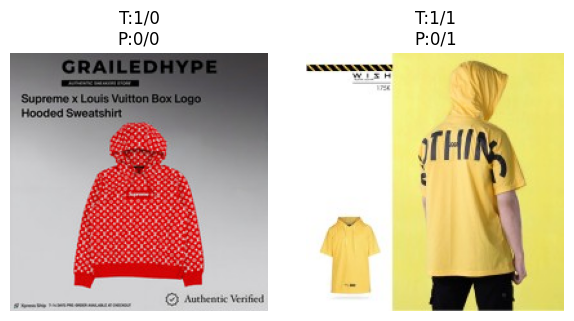

Ep1 — EMR: 0.4038
Ep2 — EMR: 0.6731
Ep3 — EMR: 0.8013
Ep4 — EMR: 0.8590
Ep5 — EMR: 0.9167
Ep6 — EMR: 0.9423
Ep7 — EMR: 0.9359
Ep8 — EMR: 0.9359
Ep9 — EMR: 0.9359
Ep10 — EMR: 0.9551


100%|██████████| 334/334 [00:32<00:00, 10.16it/s]


Saved submission_final.csv


In [23]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split, StratifiedKFold
import timm
from matplotlib import pyplot as plt

# ─── Shared Setup ────────────────────────────────────────────────────────────
ROOT      = '/kaggle/input/penyisihan-hology-7-data-mining-competition'
TRAIN_CSV = os.path.join(ROOT, 'train.csv')
SUB_CSV   = os.path.join(ROOT, 'sample_submission.csv') \
            if os.path.exists(os.path.join(ROOT,'sample_submission.csv')) \
            else os.path.join(ROOT,'submission.csv')
TRAIN_DIR = os.path.join(ROOT, 'train','train')
TEST_DIR  = os.path.join(ROOT, 'test','test')

# Load dataframes + filepaths
train_df = pd.read_csv(TRAIN_CSV).astype({'id':str})
train_map = {os.path.splitext(f)[0]:f for f in os.listdir(TRAIN_DIR)}
train_df['filepath'] = train_df['id'].map(lambda x: os.path.join(TRAIN_DIR, train_map[x]))
train_df['combo'] = train_df['jenis'].astype(str)+'_'+train_df['warna'].astype(str)

sub_df = pd.read_csv(SUB_CSV).astype({'id':str})
test_map = {os.path.splitext(f)[0]:f for f in os.listdir(TEST_DIR)}
sub_df['filepath'] = sub_df['id'].map(lambda x: os.path.join(TEST_DIR,  test_map[x]))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
IMG_SIZE = 224
val_tf = T.Compose([T.Resize((IMG_SIZE,IMG_SIZE)),
                    T.ToTensor(),
                    T.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])

class FashionDS(Dataset):
    def __init__(self, df, tf): self.df,self.tf=df.reset_index(drop=True),tf
    def __len__(self): return len(self.df)
    def __getitem__(self,i):
        r=self.df.iloc[i]
        img=Image.open(r.filepath).convert('RGB')
        return self.tf(img), torch.tensor(r.jenis).float(), torch.tensor(r.warna).long()

class MultiTaskModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.back = timm.create_model('efficientnet_b3',pretrained=True,num_classes=0,global_pool='avg')
        feat=self.back.num_features
        self.head_j = nn.Sequential(nn.Dropout(0.3), nn.Linear(feat,1))
        self.head_w = nn.Sequential(nn.Dropout(0.3), nn.Linear(feat,5))
    def forward(self,x):
        f=self.back(x)
        return self.head_j(f).squeeze(1), self.head_w(f)

# ─── 1) Error Analysis ───────────────────────────────────────────────────────
def error_analysis(model, val_loader, val_df, n_examples=8):
    model.eval()
    mis_indices = []
    with torch.no_grad():
        for i, (x,yj,yw) in enumerate(val_loader):
            x,yj,yw = x.to(device), yj.to(device), yw.to(device)
            lj, lw = model(x)
            pj = (torch.sigmoid(lj)>0.5).long()
            pw = torch.argmax(lw, dim=1)
            mask = ((pj != yj.long()) | (pw != yw))
            bad = mask.nonzero(as_tuple=True)[0].cpu().tolist()
            mis_indices += [i*val_loader.batch_size + idx for idx in bad]
    mis_indices = list(dict.fromkeys(mis_indices))  # unique
    print(f"Found {len(mis_indices)} misclassified examples in validation.")
    
    # show random subset
    chosen = random.sample(mis_indices, min(n_examples, len(mis_indices)))
    plt.figure(figsize=(12,6))
    for ix, idx in enumerate(chosen):
        r = val_df.reset_index(drop=True).iloc[idx]
        img = Image.open(r.filepath).convert('RGB')
        plt.subplot(2,4,ix+1)
        plt.imshow(img)
        # true vs pred
        with torch.no_grad():
            t = val_tf(img).unsqueeze(0).to(device)
            lj, lw = model(t)
            pred_j = int((torch.sigmoid(lj)>0.5).long())
            pred_w = int(torch.argmax(lw,1))
        plt.title(f"T:{r.jenis}/{r.warna}\nP:{pred_j}/{pred_w}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# ─── 2) Retrain Model ─────────────────────────────────────────────────────────
def retrain_model(train_df, val_df, config, save_path):
    # config = dict(lr_backbone, lr_head, wd, epochs, batch_size)
    tr_ld = DataLoader(FashionDS(train_df, val_tf), batch_size=config['batch_size'], shuffle=True, num_workers=2)
    va_ld = DataLoader(FashionDS(val_df,   val_tf), batch_size=config['batch_size'], shuffle=False,num_workers=2)
    model = MultiTaskModel().to(device)
    crit_j, crit_w = nn.BCEWithLogitsLoss(), nn.CrossEntropyLoss()
    optimizer = optim.AdamW([
        {'params':model.back.parameters(), 'lr':config['lr_backbone'], 'weight_decay':config['wd']},
        {'params':model.head_j.parameters(), 'lr':config['lr_head'],     'weight_decay':config['wd']},
        {'params':model.head_w.parameters(), 'lr':config['lr_head'],     'weight_decay':config['wd']}
    ])
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=config['epochs'])
    best_emr=0
    for ep in range(1, config['epochs']+1):
        # train
        model.train()
        for x,yj,yw in tr_ld:
            x,yj,yw = x.to(device),yj.to(device),yw.to(device)
            optimizer.zero_grad()
            lj,lw = model(x)
            loss = crit_j(lj,yj) + crit_w(lw,yw)
            loss.backward(); optimizer.step()
        scheduler.step()
        # val
        model.eval()
        total,correct=0,0
        with torch.no_grad():
            for x,yj,yw in va_ld:
                x,yj,yw = x.to(device),yj.to(device),yw.to(device)
                lj,lw = model(x)
                pj=(torch.sigmoid(lj)>0.5).long()
                pw=torch.argmax(lw,1)
                correct += ((pj==yj.long())&(pw==yw)).sum().item()
                total   += x.size(0)
        emr = correct/total
        print(f"Ep{ep} — EMR: {emr:.4f}")
        if emr>best_emr:
            best_emr=emr
            torch.save(model.state_dict(), save_path)
    return model

# ─── 3) Final Submission ─────────────────────────────────────────────────────
def make_submission(model_paths, test_df, output_csv):
    mean,std=[0.485,0.456,0.406],[0.229,0.224,0.225]
    tta_tf = [
        val_tf,
        T.Compose([T.Resize((IMG_SIZE,IMG_SIZE)),T.RandomHorizontalFlip(1.0),
                   T.ToTensor(),T.Normalize(mean,std)])
    ]
    models = []
    for p in model_paths:
        m=MultiTaskModel().to(device)
        m.load_state_dict(torch.load(p)); m.eval()
        models.append(m)
    results=[]
    for row in tqdm(test_df.itertuples(), total=len(test_df)):
        img=Image.open(row.filepath).convert('RGB')
        sum_j, sum_w, cnt = 0.0, np.zeros(5), 0
        for m in models:
            for tfm in tta_tf:
                x=tfm(img).unsqueeze(0).to(device)
                with torch.no_grad():
                    lj,lw=m(x)
                sum_j += torch.sigmoid(lj).item()
                sum_w += torch.softmax(lw,1).cpu().numpy()[0]
                cnt+=1
        avg_j, avg_w = sum_j/cnt, sum_w/cnt
        results.append({'id':row.id,'jenis':int(avg_j>0.5),'warna':int(np.argmax(avg_w))})
    sub=pd.DataFrame(results)
    sub.to_csv(output_csv, index=False)
    print(f"Saved {output_csv}")

# ─── USAGE EXAMPLE ──────────────────────────────────────────────────────────
# 1) Split baseline train→train/val
base_tr, base_va = train_test_split(train_df, test_size=0.2, stratify=train_df['combo'], random_state=42)

# 2) Load baseline model
baseline = MultiTaskModel().to(device)
baseline.load_state_dict(torch.load('best_model_fold0.pth'))

# 3) Error analysis on baseline
error_analysis(baseline, DataLoader(FashionDS(base_va,val_tf), batch_size=32), base_va)

# 4) Adjust hyperparams as needed, then retrain:
cfg = {'lr_backbone':5e-5, 'lr_head':1e-4, 'wd':1e-4, 'epochs':10, 'batch_size':32}
model_aug = retrain_model(base_tr, base_va, cfg, 'best_retrained.pth')

# 5) Final inference (ensemble multiple paths)
make_submission(
    ['best_model_fold0.pth','best_model_fold1.pth','best_retrained.pth'],
    sub_df,
    'submission_final.csv'
)